# <span style="color:red">Santander Customer Satisfaction Project</span>

<a class="anchor" id="0.1"></a>

## **Table of Contents**

3.	[Exploratory Data Analysis](#3)


### <span style="color:blue"> Import packages</span>

In [1]:
# Import packages

import pandas as pd
import numpy as np

import warnings # current version of seaborn generates a bunch of warnings 
                # that we'll ignore
warnings.filterwarnings("ignore")

import seaborn as sns
sns.set(style="white", color_codes=True)

import matplotlib
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure

### <span style="color:blue"> Load Datasets</span>

In [2]:
train = pd.read_csv("X4.csv")

train.head()

,var15,ind_var5,ind_var8_0,ind_var12_0,ind_var13_0,ind_var30,num_var30_0,num_var30,num_var42,saldo_var30,var36,TARGET
0,23,0,0,0,0,0,3,0,0,0.00,99,0
1,34,0,0,0,1,1,6,3,0,300.00,3,0
2,23,1,0,0,0,1,3,3,3,3.00,99,0
3,37,1,0,0,0,1,3,3,3,70.62,2,0
4,39,0,0,1,0,1,6,3,3,135003.00,1,0


In [3]:
train.shape

(76020, 12)

# <span style="color:red">**3. Exploratory Data Analysis**</span> <a class="anchor" id="3"></a>

Jump to [Table of Contents](#0.1)

In [4]:
train.head(3)

,var15,ind_var5,ind_var8_0,ind_var12_0,ind_var13_0,ind_var30,num_var30_0,num_var30,num_var42,saldo_var30,var36,TARGET
0,23,0,0,0,0,0,3,0,0,0.0,99,0
1,34,0,0,0,1,1,6,3,0,300.0,3,0
2,23,1,0,0,0,1,3,3,3,3.0,99,0


In [5]:
# we add and extra column with a value 1. These column help us to count group when we use groupbu

train['count'] = 1
train.head(3)

,var15,ind_var5,ind_var8_0,ind_var12_0,ind_var13_0,ind_var30,num_var30_0,num_var30,num_var42,saldo_var30,var36,TARGET,count
0,23,0,0,0,0,0,3,0,0,0.0,99,0,1
1,34,0,0,0,1,1,6,3,0,300.0,3,0,1
2,23,1,0,0,0,1,3,3,3,3.0,99,0,1


In [6]:
features = train.columns.to_list()[0:-2]
features

['var15',
 'ind_var5',
 'ind_var8_0',
 'ind_var12_0',
 'ind_var13_0',
 'ind_var30',
 'num_var30_0',
 'num_var30',
 'num_var42',
 'saldo_var30',
 'var36']

## <span style="color:blue"> 1. var15  ( Age of the customer )</span>

In [7]:
print("1.feature: ", features[0])

1.feature:  var15


In [8]:
print("number of unique values: ",train.var15.nunique())

number of unique values:  100


According to [a Kaggle form post](https://www.kaggle.com/c/santander-customer-satisfaction/forums/t/19291/data-dictionary/110414#post110414)
var15 is the age of the customer.

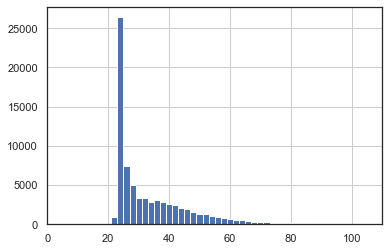

In [9]:
# plot the histogram

train['var15'].hist(bins=50);

In [10]:
mkdir plots

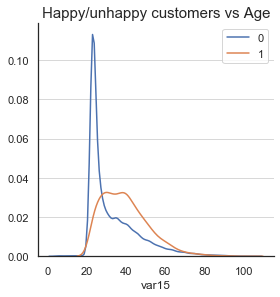

In [11]:
# Let's look at the density of the age of happy/unhappy customers
%matplotlib inline
matplotlib.use('Agg')
sns.FacetGrid(train, hue="TARGET", size=4).map(sns.kdeplot, "var15")

plt.title('Happy/unhappy customers vs Age',fontsize=15);
plt.legend(loc='upper right');
plt.grid(axis='y', alpha=0.75)
plt.savefig('plots/var15.png', dpi=100, bbox_inches='tight')


We see that young people are mostly happy. I am thinking two reasons for this:

 . Young people have less life experience so they are happy with everything
 
 . It is difficult to make happy/satisfied older people who have more experience than youngers 

## <span style="color:blue"> 2. ind_var5</span>

In [12]:
print("2.feature: ", features[1])

2.feature:  ind_var5


In [13]:
print("number of unique values: ", train['ind_var5'].nunique())

number of unique values:  2


In [14]:
a = train[['ind_var5','TARGET','count']].groupby(['ind_var5','TARGET']).count()

a['ratio'] = 0
a.loc[(0,0),'ratio'] = a.loc[(0,0),'count'] / (a.loc[(0,0),'count']+a.loc[(0,1),'count'])
a.loc[(0,1),'ratio'] = a.loc[(0,1),'count'] / (a.loc[(0,0),'count']+a.loc[(0,1),'count'])

a.loc[(1,0),'ratio'] = a.loc[(1,0),'count'] / (a.loc[(1,0),'count']+a.loc[(1,1),'count'])
a.loc[(1,1),'ratio'] = a.loc[(1,1),'count'] / (a.loc[(1,0),'count']+a.loc[(1,1),'count'])

In [15]:
# Ratio Matrix

a

count     ratio
ind_var5 TARGET                 
0        0       23602  0.923360
         1        1959  0.076640
1        0       49410  0.979211
         1        1049  0.020789

The ratio of happy and unhappy customers are 96% and 4%. 

If the found ratios are equal to 1, that number of target will be predicted 100% confidence.

if the target=0 ratio is different than 96% it will help us to predict target

if the target=1 ratio is different than 4% will help us to predict target


In [16]:
# Look at conditional probabilty

print(" P(Target=1|ind_var5=0): ", a.loc[(0,1),'ratio'].round(3))
print(" P(Target=1|ind_var5=1): ", a.loc[(1,1),'ratio'].round(3))

print("ratio: " , (a.loc[(0,1),'ratio']/a.loc[(1,1),'ratio']).round(1))

 P(Target=1|ind_var5=0):  0.077
 P(Target=1|ind_var5=1):  0.021
ratio:  3.7


The customer unsatisfaction is 3.3 times more likely when ind_var5 is absent (obtained from P(Target=1|ind_var5=0) / P(Target=1|ind_var5=1) = 7.7/2.1 = 3.7)

ind_var5      0      1
TARGET                
0         23602  49410
1          1959   1049


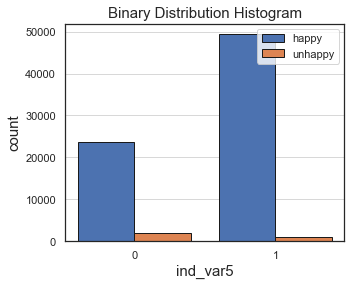

In [17]:
the_feature = 'ind_var5'

# Using Crosstab

aa = train[['ind_var5','TARGET','count']]

print(pd.crosstab(aa.TARGET,aa.ind_var5))


#Binary Distribution Histogram

plt.figure(figsize=[5,4])

plt.hist([train[train.TARGET==0][the_feature],
          train[train.TARGET==1][the_feature]], 
          bins=[-.5,.5,.5,1.5], 
          ec="k",
          label=('happy','unhappy'))

plt.xticks((0,1))
plt.grid(axis='y', alpha=0.75)

plt.xlabel('ind_var5',fontsize=15)
plt.ylabel('count',fontsize=15)

plt.title('Binary Distribution Histogram',fontsize=15)
plt.legend(loc='upper right')

plt.grid(axis='y', alpha=0.75)

plt.savefig('plots/ind_var5.png', dpi=100, bbox_inches='tight')

plt.show()

Text(0, 0.5, 'count')

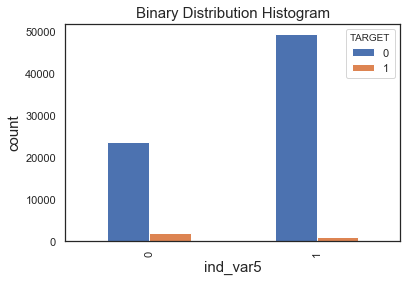

In [18]:
# Plotting Using Crosstab

%matplotlib inline

aa = train[['ind_var5','TARGET','count']]

pd.crosstab(train.ind_var5,train.TARGET).plot(kind='bar')

plt.title('Binary Distribution Histogram',fontsize=15)

plt.xlabel('ind_var5',fontsize=15)
plt.ylabel('count',fontsize=15)


ind_var5 feature definitely help us

## <span style="color:blue"> **3. ind_var8_0** </span>

In [19]:
print("3.feature: ", features[2])

3.feature:  ind_var8_0


In [20]:
print("number of unique values: ", train.ind_var8_0.nunique())

a = train[['ind_var8_0','TARGET','count']].groupby(['ind_var8_0','TARGET']).count()
a['ratio'] = 0
a.loc[(0,0),'ratio'] = a.loc[(0,0),'count'] / (a.loc[(0,0),'count']+a.loc[(0,1),'count'])
a.loc[(0,1),'ratio'] = a.loc[(0,1),'count'] / (a.loc[(0,0),'count']+a.loc[(0,1),'count'])

a.loc[(1,0),'ratio'] = a.loc[(1,0),'count'] / (a.loc[(1,0),'count']+a.loc[(1,1),'count'])
a.loc[(1,1),'ratio'] = a.loc[(1,1),'count'] / (a.loc[(1,0),'count']+a.loc[(1,1),'count'])
a

number of unique values:  2


count     ratio
ind_var8_0 TARGET                 
0          0       70738  0.962108
           1        2786  0.037892
1          0        2274  0.911058
           1         222  0.088942

In [21]:
# Look at conditional probabilty

print(" P(Target=1|ind_var8_0=0): ", a.loc[(0,1),'ratio'].round(3))
print(" P(Target=1|ind_var8_0=1): ", a.loc[(1,1),'ratio'].round(3))
print("ratio: " , (a.loc[(0,1),'ratio']/a.loc[(1,1),'ratio']).round(1))

 P(Target=1|ind_var8_0=0):  0.038
 P(Target=1|ind_var8_0=1):  0.089
ratio:  0.4


#### The customer unsatisfaction is 0.4 times more likely when ind_var8_0 is absent (obtained from P(Target=1|ind_var8_0=0) / P(Target=1|ind_var8_0=1) = 0.4)

ind_var8_0      0     1
TARGET                 
0           70738  2274
1            2786   222


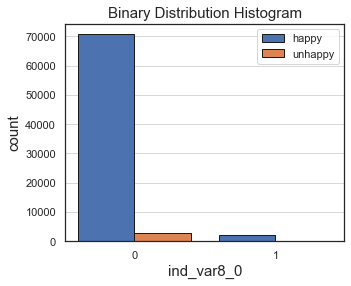

In [22]:
the_feature = 'ind_var8_0'

# Using Crosstab

aa = train[[the_feature,'TARGET','count']]

print(pd.crosstab(aa.TARGET,aa[the_feature]))


#Binary Distribution Histogram

plt.figure(figsize=[5,4])

plt.hist([train[train.TARGET==0][the_feature],
          train[train.TARGET==1][the_feature]], 
          bins=[-.5,.5,.5,1.5], 
          ec="k",
          label=('happy','unhappy'))

plt.xticks((0,1))
plt.grid(axis='y', alpha=0.75)

plt.xlabel('ind_var8_0',fontsize=15)
plt.ylabel('count',fontsize=15)

plt.title('Binary Distribution Histogram',fontsize=15)
plt.legend(loc='upper right')

plt.grid(axis='y', alpha=0.75)

plt.savefig('plots/ind_var8_0.png', dpi=100, bbox_inches='tight')

plt.show()

## <span style="color:blue"> 4. ind_var12_0</span>

In [23]:
print("4.feature: ", features[3])

4.feature:  ind_var12_0


In [24]:
print("number of unique values: ", train.ind_var12_0.nunique())

a = train[['ind_var12_0','TARGET','count']].groupby(['ind_var12_0','TARGET']).count()
a['ratio'] = 0
a.loc[(0,0),'ratio'] = a.loc[(0,0),'count'] / (a.loc[(0,0),'count']+a.loc[(0,1),'count'])
a.loc[(0,1),'ratio'] = a.loc[(0,1),'count'] / (a.loc[(0,0),'count']+a.loc[(0,1),'count'])

a.loc[(1,0),'ratio'] = a.loc[(1,0),'count'] / (a.loc[(1,0),'count']+a.loc[(1,1),'count'])
a.loc[(1,1),'ratio'] = a.loc[(1,1),'count'] / (a.loc[(1,0),'count']+a.loc[(1,1),'count'])
a

number of unique values:  2


count     ratio
ind_var12_0 TARGET                 
0           0       67940  0.958427
            1        2947  0.041573
1           0        5072  0.988116
            1          61  0.011884

In [25]:
# Look at conditional probabilty

print(" P(Target=1|ind_var12_0=0): ", a.loc[(0,1),'ratio'].round(3))
print(" P(Target=1|ind_var12_0=1): ", a.loc[(1,1),'ratio'].round(3))
print("ratio: " , (a.loc[(0,1),'ratio']/a.loc[(1,1),'ratio']).round(1))

 P(Target=1|ind_var12_0=0):  0.042
 P(Target=1|ind_var12_0=1):  0.012
ratio:  3.5


#### The customer unsatisfaction is 3.5 times more likely when ind_var12_0 is absent (obtained from P(Target=1|ind_var12_0=0) / P(Target=1|ind_var12_0=1) = 3.5)

ind_var12_0      0     1
TARGET                  
0            67940  5072
1             2947    61


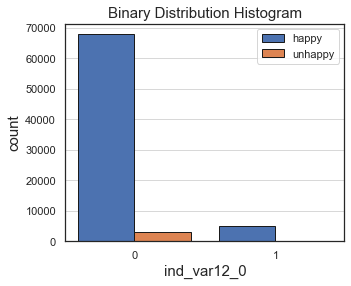

In [26]:
the_feature = 'ind_var12_0'

# Using Crosstab

aa = train[[the_feature,'TARGET','count']]

print(pd.crosstab(aa.TARGET,aa[the_feature]))


#Binary Distribution Histogram

plt.figure(figsize=[5,4])

plt.hist([train[train.TARGET==0][the_feature],
          train[train.TARGET==1][the_feature]], 
          bins=[-.5,.5,.5,1.5], 
          ec="k",
          label=('happy','unhappy'))

plt.xticks((0,1))
plt.grid(axis='y', alpha=0.75)

plt.xlabel('ind_var12_0',fontsize=15)
plt.ylabel('count',fontsize=15)

plt.title('Binary Distribution Histogram',fontsize=15)
plt.legend(loc='upper right')

plt.grid(axis='y', alpha=0.75)

plt.savefig('plots/ind_var12_0.png', dpi=100, bbox_inches='tight')

plt.show()

## <span style="color:blue"> 5. ind_var13_0</span>

In [27]:
print("5.feature: ", features[4])

5.feature:  ind_var13_0


In [28]:
print("number of unique values: ", train.ind_var13_0.nunique())

a = train[['ind_var13_0','TARGET','count']].groupby(['ind_var13_0','TARGET']).count()
a['ratio'] = 0
a.loc[(0,0),'ratio'] = a.loc[(0,0),'count'] / (a.loc[(0,0),'count']+a.loc[(0,1),'count'])
a.loc[(0,1),'ratio'] = a.loc[(0,1),'count'] / (a.loc[(0,0),'count']+a.loc[(0,1),'count'])

a.loc[(1,0),'ratio'] = a.loc[(1,0),'count'] / (a.loc[(1,0),'count']+a.loc[(1,1),'count'])
a.loc[(1,1),'ratio'] = a.loc[(1,1),'count'] / (a.loc[(1,0),'count']+a.loc[(1,1),'count'])
a

number of unique values:  2


count     ratio
ind_var13_0 TARGET                 
0           0       69067  0.958625
            1        2981  0.041375
1           0        3945  0.993202
            1          27  0.006798

In [29]:
# Look at conditional probabilty

print(" P(Target=1|ind_var13_0=0): ", a.loc[(0,1),'ratio'].round(3))
print(" P(Target=1|ind_var13_0=1): ", a.loc[(1,1),'ratio'].round(3))
print("ratio: " , (a.loc[(0,1),'ratio']/a.loc[(1,1),'ratio']).round(1))

 P(Target=1|ind_var13_0=0):  0.041
 P(Target=1|ind_var13_0=1):  0.007
ratio:  6.1


The customer unsatisfaction is 6.1 times more likely when ind_var13_0 is absent

ind_var13_0      0     1
TARGET                  
0            69067  3945
1             2981    27


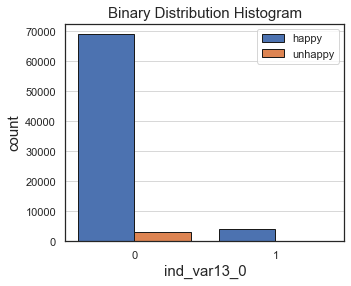

In [30]:
the_feature = 'ind_var13_0'

# Using Crosstab

aa = train[[the_feature,'TARGET','count']]

print(pd.crosstab(aa.TARGET,aa[the_feature]))


#Binary Distribution Histogram

plt.figure(figsize=[5,4])

plt.hist([train[train.TARGET==0][the_feature],
          train[train.TARGET==1][the_feature]], 
          bins=[-.5,.5,.5,1.5], 
          ec="k",
          label=('happy','unhappy'))

plt.xticks((0,1))
plt.grid(axis='y', alpha=0.75)

plt.xlabel('ind_var13_0',fontsize=15)
plt.ylabel('count',fontsize=15)

plt.title('Binary Distribution Histogram',fontsize=15)
plt.legend(loc='upper right')

plt.grid(axis='y', alpha=0.75)

plt.savefig('plots/ind_var13_0.png', dpi=100, bbox_inches='tight')

plt.show()

## <span style="color:blue"> 6. ind_var30</span>

In [31]:
print("6.feature: ", features[5])

6.feature:  ind_var30


In [32]:
print("number of unique values: ", train.ind_var30.nunique())

a = train[['ind_var30','TARGET','count']].groupby(['ind_var30','TARGET']).count()
a['ratio'] = 0
a.loc[(0,0),'ratio'] = a.loc[(0,0),'count'] / (a.loc[(0,0),'count']+a.loc[(0,1),'count'])
a.loc[(0,1),'ratio'] = a.loc[(0,1),'count'] / (a.loc[(0,0),'count']+a.loc[(0,1),'count'])

a.loc[(1,0),'ratio'] = a.loc[(1,0),'count'] / (a.loc[(1,0),'count']+a.loc[(1,1),'count'])
a.loc[(1,1),'ratio'] = a.loc[(1,1),'count'] / (a.loc[(1,0),'count']+a.loc[(1,1),'count'])
a

number of unique values:  2


count     ratio
ind_var30 TARGET                 
0         0       18524  0.912063
          1        1786  0.087937
1         0       54488  0.978065
          1        1222  0.021935

In [33]:
# Look at conditional probabilty

print(" P(Target=1|ind_var30=0): ", a.loc[(0,1),'ratio'].round(3))
print(" P(Target=1|ind_var30=1): ", a.loc[(1,1),'ratio'].round(3))
print("ratio: " , (a.loc[(0,1),'ratio']/a.loc[(1,1),'ratio']).round(1))

 P(Target=1|ind_var30=0):  0.088
 P(Target=1|ind_var30=1):  0.022
ratio:  4.0


The customer unsatisfaction is 4 times more likely when ind_var30 is absent

ind_var30      0      1
TARGET                 
0          18524  54488
1           1786   1222


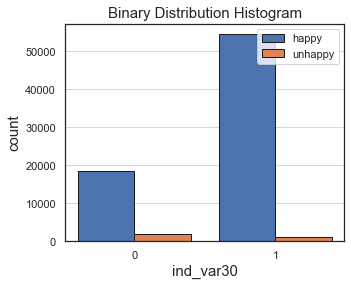

In [34]:
the_feature = 'ind_var30'

# Using Crosstab

aa = train[[the_feature,'TARGET','count']]

print(pd.crosstab(aa.TARGET,aa[the_feature]))


#Binary Distribution Histogram

plt.figure(figsize=[5,4])

plt.hist([train[train.TARGET==0][the_feature],
          train[train.TARGET==1][the_feature]], 
          bins=[-.5,.5,.5,1.5], 
          ec="k",
          label=('happy','unhappy'))

plt.xticks((0,1))
plt.grid(axis='y', alpha=0.75)

plt.xlabel('ind_var30',fontsize=15)
plt.ylabel('count',fontsize=15)

plt.title('Binary Distribution Histogram',fontsize=15)
plt.legend(loc='upper right')

plt.grid(axis='y', alpha=0.75)

plt.savefig('plots/ind_var30.png', dpi=100, bbox_inches='tight')

plt.show()

## <span style="color:blue"> 7. num_var30_0</span>

In [35]:
print("7.feature: ", features[6])

7.feature:  num_var30_0


In [36]:
print("number of unique values: ", train.num_var30_0.nunique())

number of unique values:  11


In [37]:
a = train[['num_var30_0','TARGET','count']].groupby(['num_var30_0','TARGET']).count()
a

count
num_var30_0 TARGET       
0           0         339
            1           4
3           0       65183
            1        2903
6           0        5573
            1          84
9           0        1744
            1          16
12          0         152
15          0          17
18          0           1
21          0           1
24          0           1
33          0           1
114         1           1

In [38]:
a['ratio'] = 1

a.loc[(0,0),'ratio'] = a.loc[(0,0),'count'] / (a.loc[(0,0),'count']+a.loc[(0,1),'count'])
a.loc[(0,1),'ratio'] = a.loc[(0,1),'count'] / (a.loc[(0,0),'count']+a.loc[(0,1),'count'])

a.loc[(3,0),'ratio'] = a.loc[(3,0),'count'] / (a.loc[(3,0),'count']+a.loc[(3,1),'count'])
a.loc[(3,1),'ratio'] = a.loc[(3,1),'count'] / (a.loc[(3,0),'count']+a.loc[(3,1),'count'])

a.loc[(6,0),'ratio'] = a.loc[(6,0),'count'] / (a.loc[(6,0),'count']+a.loc[(6,1),'count'])
a.loc[(6,1),'ratio'] = a.loc[(6,1),'count'] / (a.loc[(6,0),'count']+a.loc[(6,1),'count'])

a.loc[(9,0),'ratio'] = a.loc[(9,0),'count'] / (a.loc[(9,0),'count']+a.loc[(9,1),'count'])
a.loc[(9,1),'ratio'] = a.loc[(9,1),'count'] / (a.loc[(9,0),'count']+a.loc[(9,1),'count'])

a

count     ratio
num_var30_0 TARGET                 
0           0         339  0.988338
            1           4  0.011662
3           0       65183  0.957363
            1        2903  0.042637
6           0        5573  0.985151
            1          84  0.014849
9           0        1744  0.990909
            1          16  0.009091
12          0         152  1.000000
15          0          17  1.000000
18          0           1  1.000000
21          0           1  1.000000
24          0           1  1.000000
33          0           1  1.000000
114         1           1  1.000000

In [39]:
# Look at conditional probabilty

print(" P(Target=1|num_var30_0=0): ", a.loc[(0,1),'ratio'].round(3))
print(" P(Target=1|num_var30_0=1): ", a.loc[(3,1),'ratio'].round(3))

a.loc[(0,1),'ratio'].round(3)/a.loc[(3,1),'ratio'].round(3)


 P(Target=1|num_var30_0=0):  0.012
 P(Target=1|num_var30_0=1):  0.043


0.2790697674418605

num_var30_0  0      3     6     9    12   15   18   21   24   33   114
TARGET                                                                
0            339  65183  5573  1744  152   17    1    1    1    1    0
1              4   2903    84    16    0    0    0    0    0    0    1


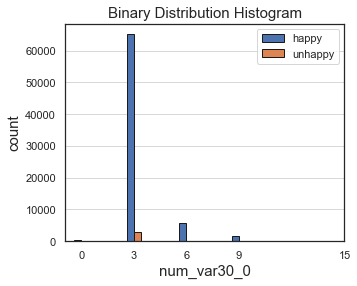

In [40]:
the_feature = 'num_var30_0'

# Using Crosstab

aa = train[[the_feature,'TARGET','count']]

print(pd.crosstab(aa.TARGET,aa[the_feature]))


#Binary Distribution Histogram

plt.figure(figsize=[5,4])

plt.hist([train[train.TARGET==0][the_feature],
          train[train.TARGET==1][the_feature]], 
          bins=[-.5,.5, 2.5,3.5, 5.5, 6.5, 8.5, 9.5], 
          ec="k",
          label=('happy','unhappy'))

plt.xticks((0,3,6,9,15))
plt.grid(axis='y', alpha=0.75)

plt.xlabel(the_feature,fontsize=15)
plt.ylabel('count',fontsize=15)

plt.title('Binary Distribution Histogram',fontsize=15)
plt.legend(loc='upper right')

plt.grid(axis='y', alpha=0.75)

plt.savefig('plots/num_var30_0.png', dpi=100, bbox_inches='tight')

plt.show()

## <span style="color:blue"> 8. num_var30</span>

In [41]:
print("8.feature: ", features[7])

8.feature:  num_var30


In [42]:
print("number of unique values: ", train.num_var30.nunique())

a = train[['num_var30','TARGET','count']].groupby(['num_var30','TARGET']).count()
a

number of unique values:  9


count
num_var30 TARGET       
0         0       18524
          1        1786
3         0       50273
          1        1179
6         0        3860
          1          41
9         0         317
          1           2
12        0          28
15        0           7
18        0           1
21        0           1
33        0           1

In [43]:
a['ratio'] = 1

a.loc[(0,0),'ratio'] = a.loc[(0,0),'count'] / (a.loc[(0,0),'count']+a.loc[(0,1),'count'])
a.loc[(0,1),'ratio'] = a.loc[(0,1),'count'] / (a.loc[(0,0),'count']+a.loc[(0,1),'count'])

a.loc[(3,0),'ratio'] = a.loc[(3,0),'count'] / (a.loc[(3,0),'count']+a.loc[(3,1),'count'])
a.loc[(3,1),'ratio'] = a.loc[(3,1),'count'] / (a.loc[(3,0),'count']+a.loc[(3,1),'count'])

a.loc[(6,0),'ratio'] = a.loc[(6,0),'count'] / (a.loc[(6,0),'count']+a.loc[(6,1),'count'])
a.loc[(6,1),'ratio'] = a.loc[(6,1),'count'] / (a.loc[(6,0),'count']+a.loc[(6,1),'count'])

a.loc[(9,0),'ratio'] = a.loc[(9,0),'count'] / (a.loc[(9,0),'count']+a.loc[(9,1),'count'])
a.loc[(9,1),'ratio'] = a.loc[(9,1),'count'] / (a.loc[(9,0),'count']+a.loc[(9,1),'count'])

a

count     ratio
num_var30 TARGET                 
0         0       18524  0.912063
          1        1786  0.087937
3         0       50273  0.977085
          1        1179  0.022915
6         0        3860  0.989490
          1          41  0.010510
9         0         317  0.993730
          1           2  0.006270
12        0          28  1.000000
15        0           7  1.000000
18        0           1  1.000000
21        0           1  1.000000
33        0           1  1.000000

In [44]:
# Look at conditional probabilty

print(" P(Target=1|num_var30=0): ", a.loc[(0,1),'ratio'].round(3))
print(" P(Target=1|num_var30=1): ", a.loc[(3,1),'ratio'].round(3))
r = a.loc[(0,1),'ratio'].round(3)/a.loc[(3,1),'ratio'].round(3)

print(f'The customer unsatisfaction is {r} times more likely when num_var30 is absent')

 P(Target=1|num_var30=0):  0.088
 P(Target=1|num_var30=1):  0.023
The customer unsatisfaction is 3.826086956521739 times more likely when num_var30 is absent


num_var30     0      3     6    9   12  15  18  21  33
TARGET                                                
0          18524  50273  3860  317  28   7   1   1   1
1           1786   1179    41    2   0   0   0   0   0


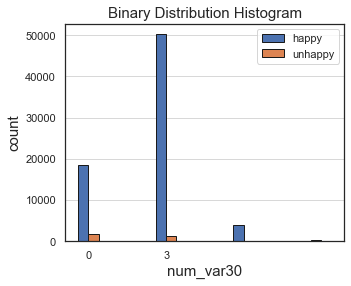

In [45]:
the_feature = 'num_var30'

# Using Crosstab

aa = train[[the_feature,'TARGET','count']]

print(pd.crosstab(aa.TARGET,aa[the_feature]))


#Binary Distribution Histogram

plt.figure(figsize=[5,4])

plt.hist([train[train.TARGET==0][the_feature],
          train[train.TARGET==1][the_feature]], 
          bins=[-.5,.5, 2.5,3.5, 5.5,6.5, 8.5,9.5, ], 
          ec="k",
          label=('happy','unhappy'))

plt.xticks((0,3))
plt.grid(axis='y', alpha=0.75)

plt.xlabel('num_var30',fontsize=15)
plt.ylabel('count',fontsize=15)

plt.title('Binary Distribution Histogram',fontsize=15)
plt.legend(loc='upper right')

plt.grid(axis='y', alpha=0.75)

plt.savefig('plots/num_var30.png', dpi=100, bbox_inches='tight')


plt.show()

## <span style="color:blue"> 9. num_var42</span>

In [46]:
print("9.feature: ", features[8])

9.feature:  num_var42


In [47]:
print("number of unique values: ", train.num_var42.nunique())

a = train[['num_var42','TARGET','count']].groupby(['num_var42','TARGET']).count()
a

number of unique values:  7


count
num_var42 TARGET       
0         0       20093
          1        1815
3         0       50897
          1        1167
6         0        1987
          1          25
9         0          30
          1           1
12        0           3
15        0           1
18        0           1

In [48]:
a['ratio'] = 1

a.loc[(0,0),'ratio'] = a.loc[(0,0),'count'] / (a.loc[(0,0),'count']+a.loc[(0,1),'count'])
a.loc[(0,1),'ratio'] = a.loc[(0,1),'count'] / (a.loc[(0,0),'count']+a.loc[(0,1),'count'])

a.loc[(3,0),'ratio'] = a.loc[(3,0),'count'] / (a.loc[(3,0),'count']+a.loc[(3,1),'count'])
a.loc[(3,1),'ratio'] = a.loc[(3,1),'count'] / (a.loc[(3,0),'count']+a.loc[(3,1),'count'])

a.loc[(6,0),'ratio'] = a.loc[(6,0),'count'] / (a.loc[(6,0),'count']+a.loc[(6,1),'count'])
a.loc[(6,1),'ratio'] = a.loc[(6,1),'count'] / (a.loc[(6,0),'count']+a.loc[(6,1),'count'])

a.loc[(6,0),'ratio'] = a.loc[(9,0),'count'] / (a.loc[(9,0),'count']+a.loc[(9,1),'count'])
a.loc[(9,1),'ratio'] = a.loc[(9,1),'count'] / (a.loc[(9,0),'count']+a.loc[(9,1),'count'])

a

count     ratio
num_var42 TARGET                 
0         0       20093  0.917154
          1        1815  0.082846
3         0       50897  0.977585
          1        1167  0.022415
6         0        1987  0.967742
          1          25  0.012425
9         0          30  1.000000
          1           1  0.032258
12        0           3  1.000000
15        0           1  1.000000
18        0           1  1.000000

### Unsatisfied customers more likely num_var42=0

num_var42     0      3     6   9   12  15  18
TARGET                                       
0          20093  50897  1987  30   3   1   1
1           1815   1167    25   1   0   0   0


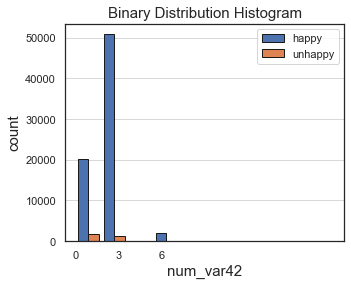

In [49]:
the_feature = 'num_var42'

# Using Crosstab

aa = train[[the_feature,'TARGET','count']]

print(pd.crosstab(aa.TARGET,aa[the_feature]))


#Binary Distribution Histogram

plt.figure(figsize=[5,4])

plt.hist([train[train.TARGET==0][the_feature],
          train[train.TARGET==1][the_feature]], 
          #bins=[-.5,.5,.5,1.5], 
          ec="k",
          label=('happy','unhappy'))

plt.xticks((0,3,6))
plt.grid(axis='y', alpha=0.75)

plt.xlabel('num_var42',fontsize=15)
plt.ylabel('count',fontsize=15)

plt.title('Binary Distribution Histogram',fontsize=15)
plt.legend(loc='upper right')

plt.grid(axis='y', alpha=0.75)

plt.savefig('plots/num_var42.png', dpi=100, bbox_inches='tight')

plt.show()

## <span style="color:blue"> 10. saldo_var30</span>

In [50]:
print("10.feature: ", features[9])

10.feature:  saldo_var30


In [51]:
print("number of unique values: ", train.saldo_var30.nunique())

number of unique values:  16940


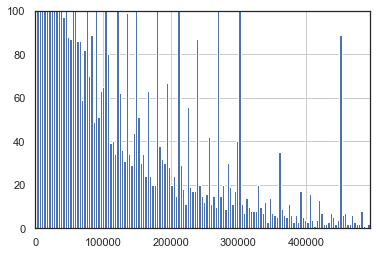

In [52]:
# Distribution Plot

train.saldo_var30.hist(bins=1000)
plt.xlim(0, train.saldo_var30.max()/7);
plt.ylim(0, 100);

In [53]:
# improve the plot by making the x axis logarithmic
train.saldo_var30 = train.saldo_var30 + 0.0001
train['log_saldo_var30'] = train.saldo_var30.map(np.log)

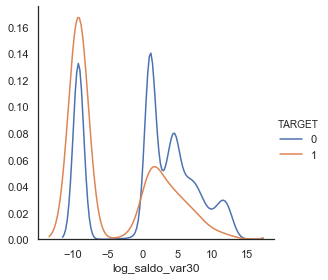

In [54]:
# Let's look at the density of happy/unhappy customers for saldo_var30

sns.FacetGrid(train, hue="TARGET", size=4) \
   .map(sns.kdeplot, "log_saldo_var30") \
   .add_legend();

plt.savefig('plots/log_saldo_var30.png', dpi=100, bbox_inches='tight')

### Unsatisfied customers more likely log_saldo_var30<-5

## <span style="color:blue"> 11. var36</span>

In [55]:
print("11.feature: ", features[10])

11.feature:  var36


In [56]:
print("number of unique values: ", train.var36.nunique())

a = train[['var36','TARGET','count']].groupby(['var36','TARGET']).count()
a

number of unique values:  5


count
var36 TARGET       
0     0         411
1     0       14203
      1         461
2     0        8463
      1         241
3     0       21809
      1         368
99    0       28126
      1        1938

var36 is most of the times 99 or [0,1,2,3]

In [57]:
a['ratio'] = 1

a.loc[(1,0),'ratio'] = a.loc[(1,0),'count'] / (a.loc[(1,0),'count']+a.loc[(1,1),'count'])
a.loc[(1,1),'ratio'] = a.loc[(1,1),'count'] / (a.loc[(1,0),'count']+a.loc[(1,1),'count'])

a.loc[(2,0),'ratio'] = a.loc[(2,0),'count'] / (a.loc[(2,0),'count']+a.loc[(2,1),'count'])
a.loc[(2,1),'ratio'] = a.loc[(2,1),'count'] / (a.loc[(2,0),'count']+a.loc[(2,1),'count'])

a.loc[(3,0),'ratio'] = a.loc[(3,0),'count'] / (a.loc[(3,0),'count']+a.loc[(3,1),'count'])
a.loc[(3,1),'ratio'] = a.loc[(3,1),'count'] / (a.loc[(3,0),'count']+a.loc[(3,1),'count'])

a.loc[(99,0),'ratio'] = a.loc[(99,0),'count'] / (a.loc[(99,0),'count']+a.loc[(99,1),'count'])
a.loc[(99,1),'ratio'] = a.loc[(99,1),'count'] / (a.loc[(99,0),'count']+a.loc[(99,1),'count'])

a

count     ratio
var36 TARGET                 
0     0         411  1.000000
1     0       14203  0.968562
      1         461  0.031438
2     0        8463  0.972312
      1         241  0.027688
3     0       21809  0.983406
      1         368  0.016594
99    0       28126  0.935538
      1        1938  0.064462

### Unsatisfied customers more likely var36=99 and var36=1

var36    0      1     2      3      99
TARGET                                
0       411  14203  8463  21809  28126
1         0    461   241    368   1938


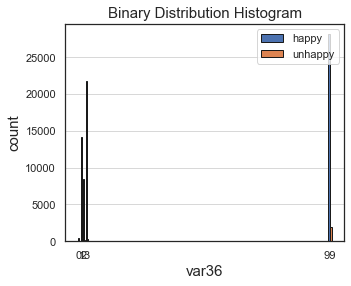

In [58]:
the_feature = 'var36'

# Using Crosstab

aa = train[[the_feature,'TARGET','count']]

print(pd.crosstab(aa.TARGET,aa[the_feature]))


#Binary Distribution Histogram

plt.figure(figsize=[5,4])

plt.hist([train[train.TARGET==0][the_feature],
          train[train.TARGET==1][the_feature]], 
          bins=[-.5,.5,1.5,2.5,3.5,98,100], 
          ec="k",
          label=('happy','unhappy'))

plt.xticks((0,1,2,3,99))
plt.grid(axis='y', alpha=0.75)

plt.xlabel(the_feature,fontsize=15)
plt.ylabel('count',fontsize=15)

plt.title('Binary Distribution Histogram',fontsize=15)
plt.legend(loc='upper right')

plt.grid(axis='y', alpha=0.75)

plt.savefig('plots/var36.png', dpi=100, bbox_inches='tight')

plt.show()

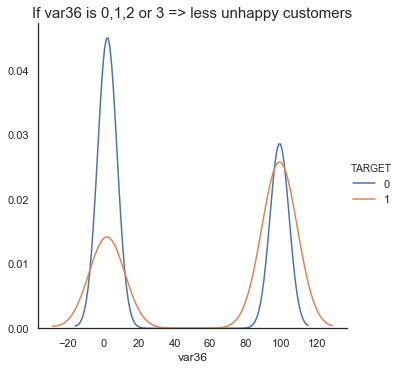

In [59]:
# Let's plot the density in function of the target variable

sns.FacetGrid(train, hue="TARGET", size=5).map(sns.kdeplot, "var36").add_legend()
plt.title('If var36 is 0,1,2 or 3 => less unhappy customers',fontsize=15);

plt.savefig('plots/var36.png', dpi=100, bbox_inches='tight')